# Import required libraries

In [1]:
import pandas as pd
import datetime as dt
import seaborn as sns
import plotly.graph_objects as go
import plotly.figure_factory as ff
%matplotlib inline

# Import data

In [2]:
posts = pd.read_csv('../Task_1/posts.csv', index_col=0)

In [3]:
posts.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100180 entries, 0 to 100179
Data columns (total 15 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   title            100180 non-null  object
 1   score_pushshift  100180 non-null  int64 
 2   id               100180 non-null  object
 3   url              100180 non-null  object
 4   num_comments     100180 non-null  int64 
 5   created_utc      100180 non-null  int64 
 6   selftext         100180 non-null  object
 7   author           100180 non-null  object
 8   is_self          100180 non-null  bool  
 9   subreddit        100180 non-null  object
 10  cleared_text     100180 non-null  object
 11  link_flair_text  29963 non-null   object
 12  num_crossposts   100180 non-null  int64 
 13  title_cleared    100010 non-null  object
 14  score            100180 non-null  int64 
dtypes: bool(1), int64(5), object(9)
memory usage: 11.6+ MB


In [4]:
posts.head()

title  score_pushshift      id  \
0                                 What do you Think?                1  bm70s3   
1  Me [26 M] with my fiancee [22 F], been togethe...                2  bm748u   
2  I [F25] am at my wits end with a good friend o...                1  bm74mc   
3  I (26F) want to confess to him (28M) even thou...                3  bm75mj   
4  I made a mistake and now Im losing my best fri...                0  bm78pe   

                                                 url  num_comments  \
0  https://www.reddit.com/r/relationships/comment...            12   
1  https://www.reddit.com/r/relationships/comment...             5   
2  https://www.reddit.com/r/relationships/comment...             1   
3  https://www.reddit.com/r/relationships/comment...             8   
4  https://www.reddit.com/r/relationships/comment...             9   

   created_utc                                           selftext  \
0   1557331262  &amp;#x200B;\n\n&amp;#x200B;\n\n \n\n    **TL;...   
1   1557331718  My fiancee and I have been together for almost...   
2   1557331771  Ok so for some background, my friend is an att...   
3   1557331911  Ok, not something new, but i'm a bit lost here...   
4   1557332337  I always try to do the right thing, but I don'...   

            author  is_self      subreddit  \
0        Dongustas     True  relationships   
1       orangeplum     True  relationships   
2      saidhasdhxD     True  relationships   
3         kokoko38     True  relationships   
4  Assistant_tothe     True  relationships   

                                        cleared_text link_flair_text  \
0   amp amp tl dr friends conversation relationsh...           [new]   
1  fiancee together almost years wedding schedule...           [new]   
2  ok background friend attractive well educated ...    Non-Romantic   
3  ok something new i bit lost here so know guy l...           [new]   
4  always try right thing know deal mistake i dat...           [new]   

   num_crossposts                                      title_cleared  score  
0               0                                             think       1  
1               0   m fiancee f together years engaged sure want ...      2  
2               0   wits end good friend mine unrelentingly negat...      1  
3               0   want confess even though know feelings someon...      4  
4               0                made mistake im losing best friend       0

# Data preprocessing

In [5]:
target = {
    'family':             0,
    'Parenting':          1,
    'depression':         2,
    'askwomenadvice':     3,
    'SuicideWatch':       4,
    'Marriage':           5,
    'TwoXChromosomes':    6,
    'love':               7,
    'relationships':      8,
    'DecidingToBeBetter': 9
}
posts['target'] = posts['subreddit'].apply(lambda x: target[x])

In [6]:
posts['target'].value_counts()

3    10037
2    10035
9    10028
8    10026
6    10021
4    10016
7    10009
1    10004
0    10002
5    10002
Name: target, dtype: int64

In [7]:
posts['date'] = posts['created_utc'].apply(dt.datetime.fromtimestamp)

In [8]:
posts['cleared_text'] = posts['cleared_text'].apply(lambda x: x.strip())
posts['title_cleared'] = posts['title_cleared'].apply(lambda x: str(x).strip())

In [9]:
def text_len(text):
    return len(text.split(" "))

In [10]:
posts['text_len'] = posts['cleared_text'].apply(text_len)
posts['title_len'] = posts['title_cleared'].apply(text_len)

Delete invalid documents

In [11]:
posts.drop(posts[posts['text_len']<30].index, inplace=True) # документ с кол-вом слов меньше 30 

# Exploratory data analysis

In [12]:
df_stat = posts[['target', 'score', 'num_comments', 'title_len', 'text_len']]

In [13]:
df_stat.drop('target', axis=1).describe()

score   num_comments      title_len       text_len
count  100174.000000  100174.000000  100174.000000  100174.000000
mean       49.754437      12.318316       5.458492     199.959560
std       650.147992      57.158263       3.614312     160.901384
min         0.000000       0.000000       1.000000      59.000000
25%         1.000000       1.000000       3.000000     109.000000
50%         2.000000       4.000000       5.000000     152.000000
75%         7.000000      10.000000       7.000000     232.000000
max     55573.000000    4963.000000      39.000000    6144.000000

In [14]:
df_stat.groupby('target').describe()

score                                                         \
          count        mean          std  min  25%  50%   75%      max   
target                                                                   
0       10001.0   12.145585    42.522023  0.0  1.0  2.0   5.0   1070.0   
1       10004.0   45.378549   220.615358  0.0  1.0  4.0  10.0   5627.0   
2       10035.0    7.148480    60.827736  0.0  1.0  2.0   3.0   2949.0   
3       10037.0   19.571984   107.866977  0.0  1.0  1.0   3.0   2089.0   
4       10014.0    9.532355    67.726048  0.0  1.0  2.0   4.0   3221.0   
5       10002.0   23.036693   108.531534  0.0  1.0  4.0   8.0   2259.0   
6       10020.0  251.502395  1964.008511  0.0  0.0  2.0   9.0  55573.0   
7       10007.0   29.761667   127.170687  0.0  2.0  5.0  11.0   5088.0   
8       10026.0   28.348594   210.858470  0.0  1.0  1.0   3.0   8056.0   
9       10028.0   71.052553   421.291163  0.0  2.0  4.0  12.0  25476.0   

       num_comments             ... title_len       text_len              \
              count       mean  ...       75%   max    count        mean   
target                          ...                                        
0           10001.0   8.383762  ...       7.0  31.0  10001.0  229.137486   
1           10004.0  21.461016  ...       7.0  36.0  10004.0  172.121351   
2           10035.0   2.528251  ...       6.0  36.0  10035.0  186.159841   
3           10037.0   8.874066  ...       8.0  36.0  10037.0  183.770250   
4           10014.0   4.497603  ...       6.0  33.0  10014.0  187.212602   
5           10002.0  20.001500  ...       6.0  36.0  10002.0  208.358228   
6           10020.0  31.898104  ...       8.0  34.0  10020.0  194.447904   
7           10007.0   3.351954  ...       5.0  34.0  10007.0  193.004697   
8           10026.0  14.578097  ...       9.0  32.0  10026.0  251.357670   
9           10028.0   7.636318  ...       7.0  39.0  10028.0  194.056941   

                                                       
               std   min    25%    50%    75%     max  
target                                                 
0       191.044761  62.0  122.0  177.0  271.0  3824.0  
1       115.690626  66.0  104.0  139.0  197.0  2290.0  
2       163.306844  67.0  104.0  140.0  208.0  6144.0  
3       133.929045  67.0  106.0  143.0  215.0  2860.0  
4       154.572447  63.0  106.0  142.0  210.0  4000.0  
5       164.030500  63.0  114.0  161.0  243.0  3258.0  
6       140.475228  63.0  107.0  151.0  231.0  2708.0  
7       166.897879  59.0  106.0  142.0  217.0  4707.0  
8       181.725097  70.0  138.0  200.0  302.0  2713.0  
9       167.210129  67.0  104.0  143.0  220.0  3827.0  

[10 rows x 32 columns]

# Visualization

In [36]:
def plot_distribution(metric, start, end, size):
    fig = go.Figure()
    fig.add_trace(
        go.Histogram(
            x=df_stat[metric],
            name=metric,
            xbins=dict(
                start=start,
                end=end,
                size=size
            )
        )
    )
    fig.update_layout(
        barmode='overlay',
        title_text=metric +' distribution',
        xaxis_title_text='Value', # xaxis label
        yaxis_title_text='Count', # yaxis label
    )
    fig.show()

In [37]:
plot_distribution('score',0,50,2)

In [38]:
plot_distribution('num_comments',0,100,2)

In [18]:
plot_distribution('text_len',0,1000,25)

In [19]:
plot_distribution('title_len',0,40,1)

# Paired scatter plots

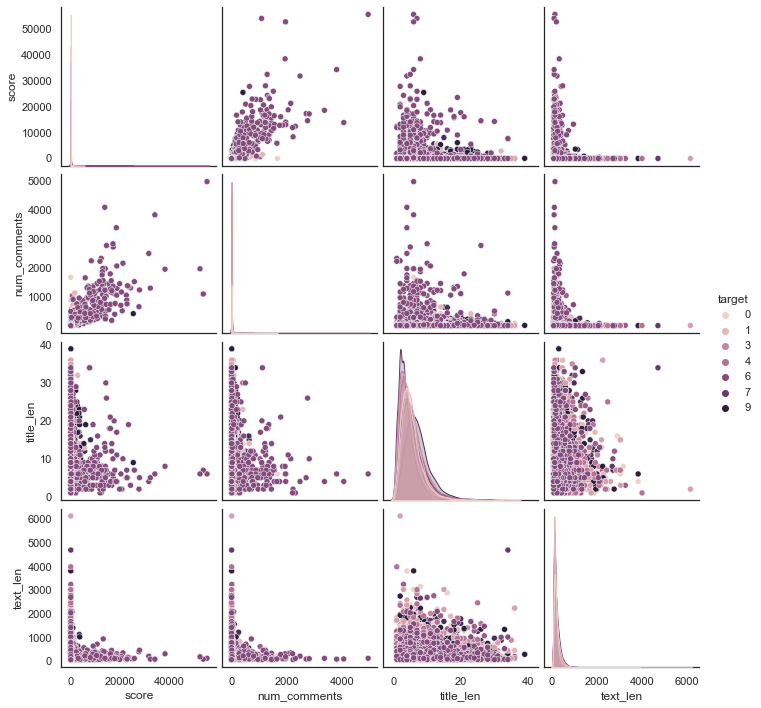

In [27]:
sns.set(
    style="white", 
    palette="muted", 
    color_codes=True
)
sns_plot = sns.pairplot(df_stat, hue='target')

# Correlation matrix

In [39]:
corrs = df_stat.drop('target', axis =1).corr()
fig = ff.create_annotated_heatmap(
    z=corrs.values,
    x=list(corrs.columns),
    y=list(corrs.index),
    annotation_text=corrs.round(2).values,
    showscale=True)
fig.show()

# Export data

In [22]:
posts.to_csv('train.csv')